## Analyse der Sonnenfleckendaten

Im vorliegenden Notizbuch werden die Daten über die Sonnenflecken von SILO geladen und analysiert.<br>
Datenquelle: https://www.sidc.be/SILSO/datafiles

## Inhaltsverzeichnis

1. [Importe](#1.-Importe)<br>
2. [Daten laden](#2.-Daten-laden)<br>
3. [Datenaufbereitung](#3.-Datenaufbereitung)<br>
4. [Statistische Kennzahlen](4.-StatistischeKennzahlen)<br>
5. [Datenanalyse](#5.-Datenanalyse)<br>
    5.01 [Balkendiagramm mit der Anzahl Sonnenflecken von 1850 bis Anfang 2023 (Abbildung 6)](#5.01-Balkendiagramm-mit-der-Anzahl-Sonnenflecken-von-1850-bis-Anfang-2023-(Abbildung-6))<br>
    5.02 [Boxplot (Abbildung 7)](#5.02-Boxplot-(Abbildung-7))<br>
    5.03 [Histogramm (Abbildung 8)](#5.03-Histogramm-(Abbildung-8))<br>
    5.04 [Balkendiagramm August und September 1859 (Abbildung 9)](#5.04-Balkendiagramm-August-und-September-1859-(Abbildung-9))<br>
    5.05 [Carrington-Ereignis: Anzahl Sonnenflecken und Perzentil](#5.05-Carrington-Ereignis:-Anzahl-Sonnenflecken-und-Perzentil)<br>
    5.06 [Balkendiagramm Oktober und November 2003 (Abbildung 10)](#5.06-Balkendiagramm-Oktober-und-November-2003-(Abbildung-10))<br>
    5.07 [Halloween Sonnenstürme: Anzahl Sonnenflecken und Perzentile](#5.07-Halloween-Sonnenstürme:-Anzahl-Sonnenflecken-und-Perzentile)<br>
    5.08 [Balkendiagramm März 1989](#5.08-Balkendiagramm-März-1989)<br>
    5.09 [Halloween Sonnenstürme: Anzahl Sonnenflecken und Perzentile](#5.09-Halloween-Sonnenstürme:-Anzahl-Sonnenflecken-und-Perzentile)<br>
    5.10 [Balkendiagramm durchschnittliche Anzahl Sonnenflecken pro Monat 1975 bis 2016 (Abbildung 12)](#5.10-Balkendiagramm-durchschnittliche-Anzahl-Sonnenflecken-1975-bis-2016-(Abbildung-12))<br>
    5.11 [Sonnensturm mit der Intensität des Carrington-Ereignis im Juli 2012](#5.11-Sonnensturm-mit-der-Intensität-des-Carrington-Ereignis-im-Juli-2012)<br>
    5.12 [Sonnenzyklus 19: Der bisher aktivste Sonnenzyklus](#5.12-Sonnenzyklus-19:-Der-bisher-aktivste-Sonnenzyklus)<br>
    5.13 [QQ-Plot](#5.13-QQ-Plot)<br>

## 1. Importe

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import seaborn as sns
import statsmodels.api as sm

## 2. Daten laden

In [3]:
# get data from CSV-file
df = pd.read_csv('data_sunspots.csv', sep=';')

date = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))

df.insert(0, "date", date, True)

## 3. Datenaufbereitung

In [4]:
# Bis 1848 gibt es immer wieder fehlende Wert (mit "-1" gekennzeichnet).
# Damit die fehlende Werte keinen störenden Einfluss auf die Berechnungen haben,
# werden erst die Daten ab dem Jahr 1850 verwendet
df_spots = df[df.date > '1850-01-01'][['date','sunspots']]

# Setze die Spalte 'date' als Index
df_spots.set_index('date', inplace=True)

## 4. Statistische Kennzahlen

Die Daten enthalten sehr viele Daten ohne Sonnenflecken. Erklärung: Während einem Sonnenminimum (solar minimum) ist es normal, dass es Tage ohne Sonnenflecken gibt. Durchschnittlich gibt es während einem Sonnenminimum 485 Tage, an denen die Sonne keine Flecken hat.
(Quelle:https://www.spaceweather.com/glossary/spotlessdays.htm#:~:text=A%20spotless%20day%20is%20a,the%20sun%20is%20very%20quiet)

In [5]:
# Statistische Kennzahlen der Spalte 'sunspots'
print(df_spots.sunspots.describe(include='all'))
print("Modus: ", df_spots.sunspots.mode())

count    63245.000000
mean        83.131251
std         76.978280
min          0.000000
25%         21.000000
50%         63.000000
75%        128.000000
max        528.000000
Name: sunspots, dtype: float64
Modus:  0    0
Name: sunspots, dtype: int64


## 5. Datenanalyse

### 5.01 Balkendiagramm mit der Anzahl Sonnenflecken von 1850 bis Anfang 2023 (Abbildung 6)

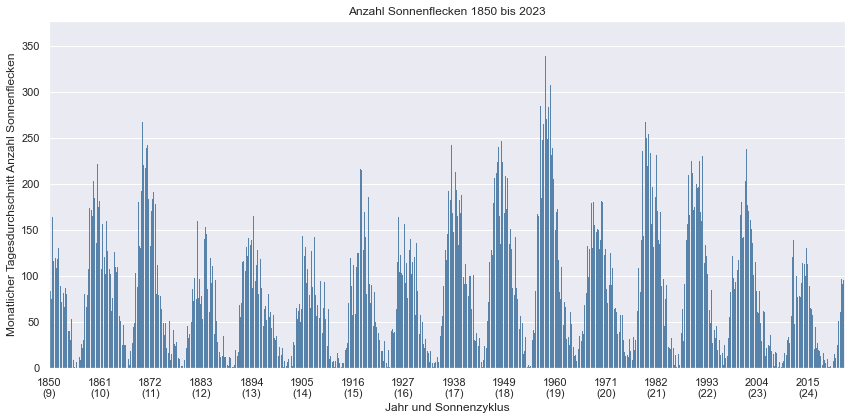

In [25]:
# Nehme den monatlichen Durchschnitt
df_spots_2 = df_spots.resample('M').mean()

# Erstelle ein Balkendiagramm
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_spots_2.index, y=df_spots_2['sunspots'], color='#4984b8', lw=0)

# Erstelle Labels für die Jahre und die Sonnenzyklen
ticklabels = ['']*len(df_spots_2.index)
ticklabels[::132] = ['1850\n(9)', '1861\n(10)', '1872\n(11)', '1883\n(12)', '1894\n(13)', '1905\n(14)',
                     '1916\n(15)', '1927\n(16)', '1938\n(17)', '1949\n(18)', '1960\n(19)', '1971\n(20)',
                     '1982\n(21)', '1993\n(22)', '2004\n(23)', '2015\n(24)']

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken 1850 bis 2023', xlabel='Jahr und Sonnenzyklus',
       ylabel='Monatlicher Tagesdurchschnitt Anzahl Sonnenflecken')

# Setze die erstellen Labels an die X-Achse
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

### 5.02 Boxplot (Abbildung 7)

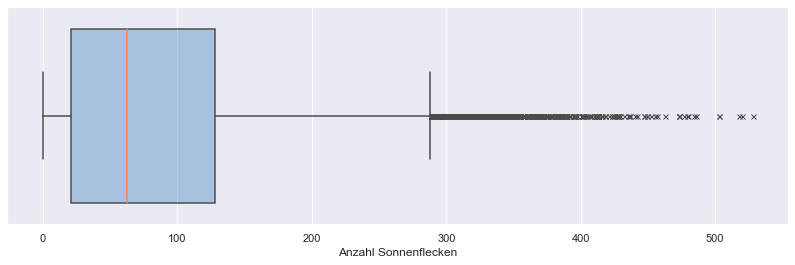

In [26]:
sns.boxplot(
    data=df_spots, x="sunspots",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Anzahl Sonnenflecken") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

### 5.03 Histogramm (Abbildung 8)

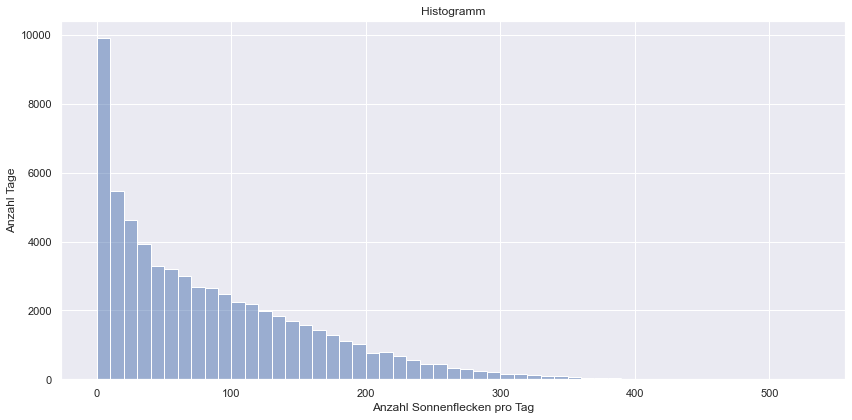

In [8]:
# Histogramm erstellen
plt.figure(figsize=(12, 6), tight_layout=True)

# die Breite von 10 wird genommen, damit die Verteilung besser aussieht
ax2 = sns.histplot(data=df_spots, binwidth=10, legend=False)

# Labels und Titel definieren
ax2.set(title='Histogramm', xlabel='Anzahl Sonnenflecken pro Tag', ylabel='Anzahl Tage')

plt.show()

### 5.04 Balkendiagramm August und September 1859 (Abbildung 9)
Anzeigen der Daten rund um den Zeitpunkt des Carrington-Ereignisses. Überraschenderweise waren die Anzahl Sonnenflecken zum Zeitpunkt des Carrington-Ereignisses (01.09.1859) nicht aussergewöhnlich hoch. Kritische Hinterfragung: Sind die Anzahl Sonnenflecken wird die passenden Daten für diese Berechnung?

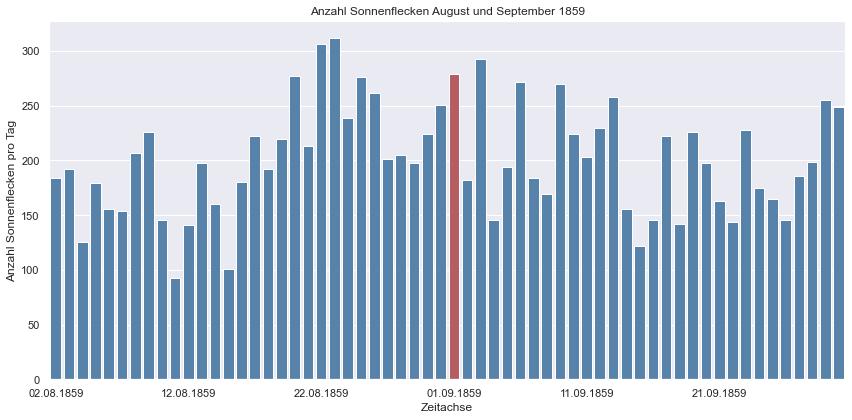

In [9]:
# Erstellung neues Dataframe für den Zeitraum 01.08.1859 - 01.10.1859
df_1859 = df[(df.date > '1859-08-01') & (df.date < '1859-10-01')][['date','sunspots']]
df_1859.set_index('date', inplace=True)

# Den Tag der Sonneneruption des Carrington-Ereignisses (Stärke X45), 01.09.1859, der Variable 'carrington' zuordnen
carrington = datetime.strptime('09-01-1859', '%m-%d-%Y')

# Den Tag 01.09.1859 mit einer roten Markierung hervorheben
clrs = ['r' if x == carrington else '#4984b8' for x in df_1859.index]

# Erstellung eines Barplots für das Dataframe df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1859.index, y=df_1859['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1859.index)
ticklabels[::10] = [item.strftime('%d.%m.%Y') for item in df_1859.index[::10]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken August und September 1859', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

### 5.05 Carrington-Ereignis: Anzahl Sonnenflecken und Perzentil

In [10]:
# Wie viele Sonnenflecken wurden am 01.09.1859 beobachtet,
# dem Tag der Sonneneruption des Carrington-Ereignisses?
df[(df.date == '1859-09-01')][['date','sunspots']]

,date,sunspots
15218,1859-09-01,279


In [11]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 279?
percentile = percentileofscore(df_spots['sunspots'], 279)
print("Die Zahl 279 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 279 liegt im 97.87018736659024 Perzentil.


### 5.06 Balkendiagramm Oktober und November 2003 (Abbildung 10)

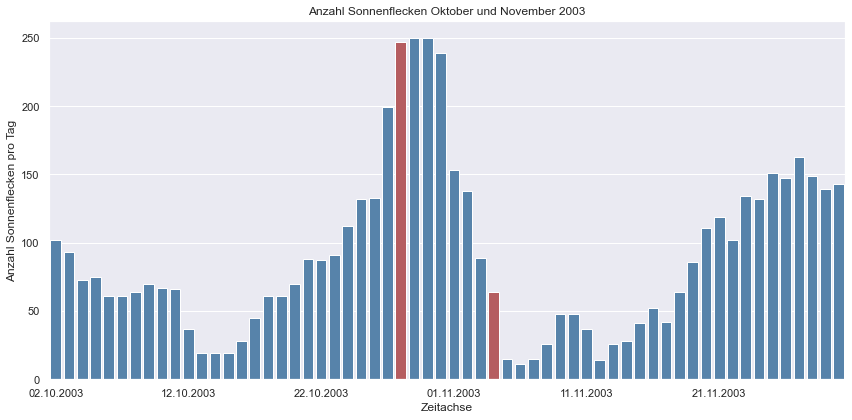

In [12]:
# Erstellung neues Dataframe für den Zeitraum 01.10.2003 - 01.12.2003
df_2003 = df[(df.date > '2003-10-01') & (df.date < '2003-12-01')][['date','sunspots']]
df_2003.set_index('date', inplace=True)

# Die Tage der Sonneneruptionen mit der Stärke X17.2 (28.10.2003)
# und X28 (04.11.2003) den Variablen date_1 und date_2 zuordnen
date_1 = datetime.strptime('10-28-2003', '%m-%d-%Y')
date_2 = datetime.strptime('11-04-2003', '%m-%d-%Y')

# Die Tage 28.10.2003 und 04.11.2003 mit einer roten Markierung hervorheben
clrs = ['r' if x == date_1 or x == date_2 else '#4984b8' for x in df_2003.index]

# Erstellung eines Barplots für das Datafram df_2003
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_2003.index, y=df_2003['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_2003.index)
ticklabels[::10] = [item.strftime('%d.%m.%Y') for item in df_2003.index[::10]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken Oktober und November 2003', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

### 5.07 Halloween Sonnenstürme: Anzahl Sonnenflecken und Perzentile
Am 28.10.2003 ereignete sich eine Sonneneruption der Stärke X17.2. Dies löste einen Sonnensturm aus, der unter anderem zu Stromausfällen in Südschweden geführt hat.

Am 04.11.2003 ereignete sich eine Sonneneruption der Stärke X28. Dies ist die Stärke je aufgezeichnete Sonneneruption. Der daraus resultierende Sonnensturm ist an der Erde knapp vorbeigezogen.

In [13]:
# Wie viele Sonnenflecken wurden am 28.10.2003 und am 04.11.2003 beobachtet?
df[(df.date == '2003-10-28') | (df.date == '2003-11-04')][['date','sunspots']]

,date,sunspots
67870,2003-10-28,247
67877,2003-11-04,64


In [14]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 247?
percentile = percentileofscore(df_spots['sunspots'], 247)
print("Die Zahl 247 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 247 liegt im 96.03367855166417 Perzentil.


In [15]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 64?
percentile = percentileofscore(df_spots['sunspots'], 64)
print("Die Zahl 64 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 64 liegt im 50.321764566368884 Perzentil.


### 5.08 Balkendiagramm März 1989

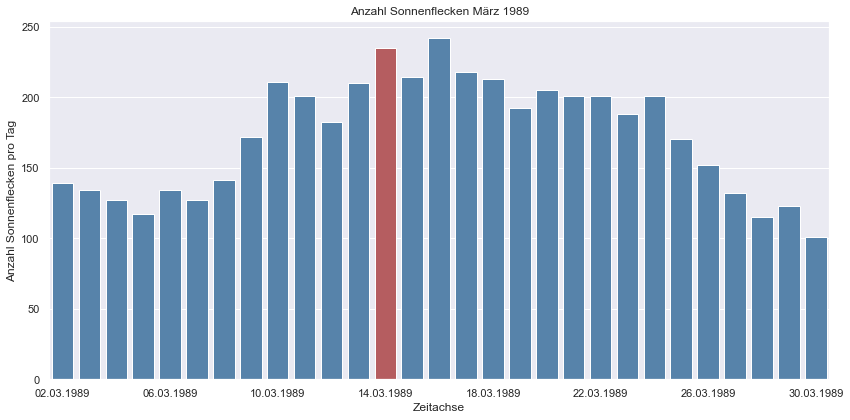

In [16]:
# Erstellung neues Dataframe für den Zeitraum 01.03.1989 - 31.03.1989
df_1989 = df[(df.date > '1989-03-01') & (df.date < '1989-03-31')][['date','sunspots']]
df_1989.set_index('date', inplace=True)

# 14.03.1989, der Tag der die Sonneneruption, welche das Quebec Blackout ausgelöst hat (Stärke X1.1),
# der Variable 'quebec' zuordnen
quebec = datetime.strptime('03-14-1989', '%m-%d-%Y')

# Den Tag 14.03.1989 mit einer roten Markierung hervorheben
clrs = ['r' if x == quebec else '#4984b8' for x in df_1989.index]

# Erstellung eines Barplots für das Datafram df_1989
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1989.index, y=df_1989['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1989.index)
ticklabels[::4] = [item.strftime('%d.%m.%Y') for item in df_1989.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken März 1989', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

### 5.09 Quebec-Blackout: Anzahl Sonnenflecken und Perzentile

In [17]:
# Wie viele Sonnenflecken wurden am 14.03.1989 beobachtet,
# dem Tag der Sonneneruption, die das Quebec Blackout ausgelöst hat?
df[(df.date == '1989-03-14')][['date','sunspots']]

,date,sunspots
62529,1989-03-14,235


In [18]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 235?
percentile = percentileofscore(df_spots['sunspots'], 235)
print("Die Zahl 235 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 235 liegt im 95.12451577199779 Perzentil.


### 5.10 Balkendiagramm durchschnittliche Anzahl Sonnenflecken 1975 bis 2016 (Abbildung 12)

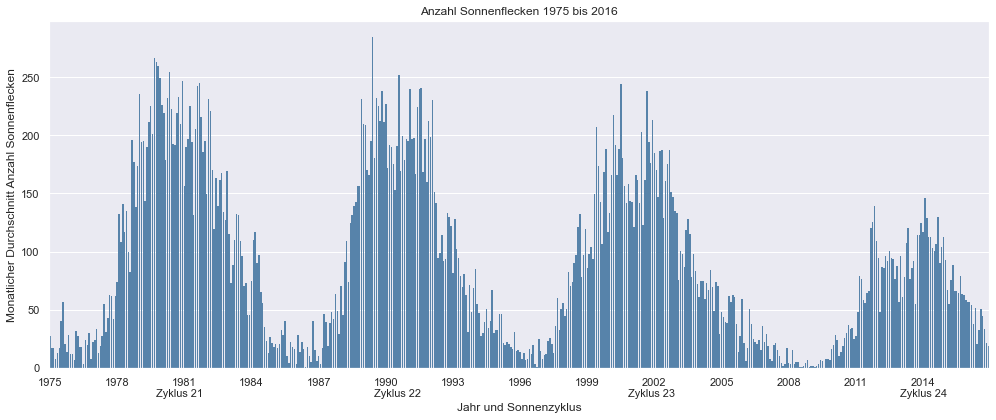

In [19]:
# Nehme die Daten von 1975 bis 2016
df_spots_7 = df[(df.date > '1974-12-31') & (df.date < '2017-01-01')][['date','sunspots']]

# Setze Spalte 'date' als Index
df_spots_7.set_index('date', inplace=True)

# Nehme den monatlichen Schnitt
df_spots_7 = df_spots_7.resample('M').mean()

# Erstelle ein Balkendiagramm
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_spots_7.index, y=df_spots_7['sunspots'], color='#4984b8', lw=0.)

# Erstelle Labels für die Jahre und die Sonnenzyklen
ticklabels = ['']*len(df_spots_7.index)
ticklabels[::36] = ['1975', '1978', '1981\nZyklus 21   ', '1984', '1987',
                     '1990\n        Zyklus 22', '1993', '1996', '1999', '2002\nZyklus 23  ', '2005',
                     '2008', '2011', '2014\nZyklus 24']

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken 1975 bis 2016', xlabel='Jahr und Sonnenzyklus',
       ylabel='Monatlicher Durchschnitt Anzahl Sonnenflecken')

# Setze die erstellen Labels an die X-Achse
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Verändere die Breite und Höhe des Plots
fig = plt.gcf()
fig.set_size_inches(14, 6)

plt.show()

### 5.11 Sonnensturm mit der Intensität des Carrington-Ereignis im Juli 2012

In [20]:
# Wie viele Sonnenflecken wurden am 23.07.2012 beobachtet, dem Tag der Sonneneruption,
# die einen Sonnensturm mit einer vergleichbaren Intensität wie das Carrington-Ereignis ausgelöst hat?
df[(df.date == '2012-07-23')][['date','sunspots']]

,date,sunspots
71061,2012-07-23,63


In [21]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 63?
percentile = percentileofscore(df_spots['sunspots'], 63)
print("Die Zahl 63 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 63 liegt im 49.90196853506206 Perzentil.


### 5.12 Sonnenzyklus 19: Der bisher aktivste Sonnenzyklus
Bei dieser Abbildung ist der Höhepunkt im Jahr 1957 sehr auffällig.Die höchste Anzahl Sonnenflecken pro Jahr ist bei 855 Sonnenflecken im Jahr 1957.<br>
(Quelle: https://adsabs.harvard.edu/full/1958PASP...70..299C)

Bisher aktivster Sonnenzyklus war der Sonnenzyklus 19 mit 201 Sonnenflecken.<br>
(Quelle: https://earthobservatory.nasa.gov/images/8405/the-dawn-of-a-new-solar-cycle)

Auflistung der Rekord-Monate bezüglich Anzahl Sonnenflecken: https://www.sws.bom.gov.au/Educational/2/3/5

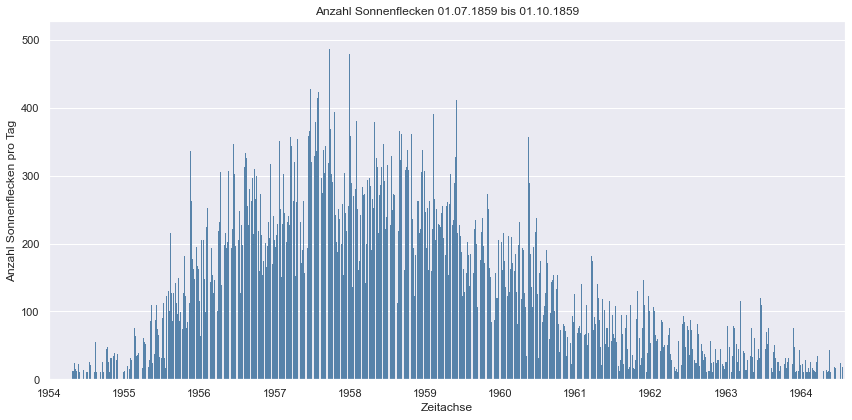

In [22]:
# Anzeigen der Daten im Sonnenzyklus 19 (April 1954 bis Oktober 1964)
# Quelle: https://de.wikibrief.org/wiki/Solar_cycle_19

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_sz19 = df[(df.date > '1954-04-01') & (df.date < '1964-11-01')][['date','sunspots']]
df_sz19.set_index('date', inplace=True)

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_sz19.index, y=df_sz19['sunspots'], color='#4984b8', lw=0.)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_sz19.index)
ticklabels[::365] = [item.strftime('%Y') for item in df_sz19.index[::365]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken 01.07.1859 bis 01.10.1859', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

### 5.13 QQ-Plot
Erkenntnis aus QQ-Plot: die Daten sind nicht normalverteilt.

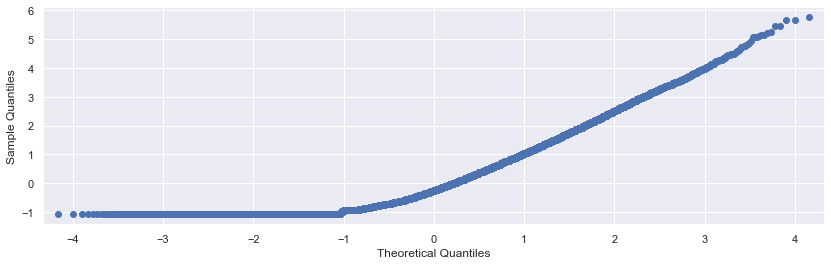

In [23]:
## QQ-Plot
sm.qqplot(df_spots.sunspots, fit=True)
plt.show()

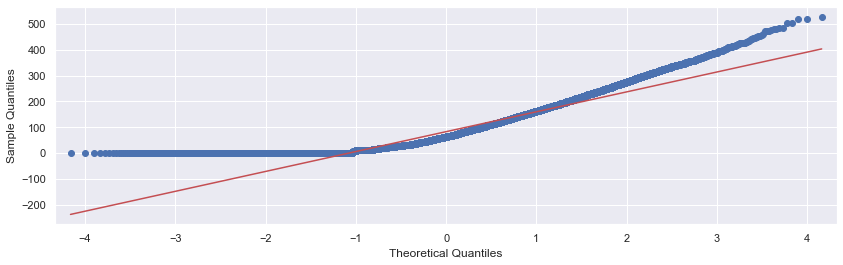

In [24]:
# QQ-Plot im Vergleich zu einer Normalverteilung (rote Linie)
sm.qqplot(df_spots.sunspots, line ='s')
plt.show()